In [ ]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Загрузим предобученную модель
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Устанавливаем модель в режим evaluation


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 157MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

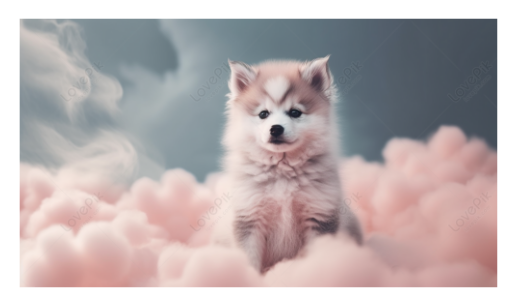

In [2]:
from torchvision import transforms
from PIL import Image
import torch
import os
import matplotlib.pyplot as plt


# path = "C:/Users/PT01487090/OneDrive - Prosegur Cia. De Seguridad, S.A/Ambiente de Trabalho/Datasets/"

# Загрузка изображения
# image_path = os.path.join(path, "husky.png")
image = Image.open("husky.png").convert("RGB")

plt.imshow(image)
plt.axis('off')

# Преобразование изображения
transform = transforms.Compose([
    transforms.ToTensor()
])

image_tensor = transform(image).unsqueeze(0)


In [ ]:
with torch.no_grad():
    prediction = model(image_tensor)


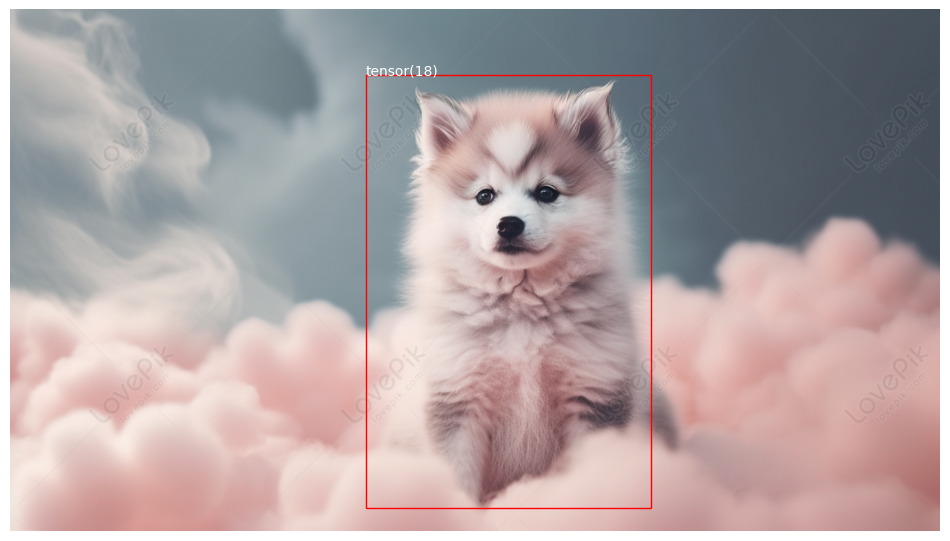

In [ ]:
import matplotlib.patches as patches

# Отобразим изображение с обнаруженными объектами
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Настройка порога для фильтрации слабых детекций
confidence_threshold = 0.85

for box, score, label in zip(prediction[0]['boxes'], prediction[0]['scores'], prediction[0]['labels']):
    # print(box)
    if score > confidence_threshold:
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1], str(label), color="white")

plt.axis("off")
plt.show()


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 51.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 277MB/s]


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn, transform
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Загрузка предварительно обученной модели YOLOv3
# model = torch.hub.load('ultralytics/yolov8', 'yolov8s', source='github')  # это YOLOv5s, небольшая версия YOLOv5
model.eval()

# Загрузка изображения
# image_path = "Dog.jpg"
# image = Image.open(image_path)

# Преобразование изображения и детекция
results = model(image)

# Отрисовка результатов
results.show()


Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 169M/169M [00:04<00:00, 39.2MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:21<00:00, 5561.35file/s]

Dataset download success ✅ (1324.8s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 99.8MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 300MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/coco/labels/train2017... 117266 images, 1021 backgrounds, 0 corrupt: 100%|██████████| 118287/118287 [05:33<00:00, 354.22it/s]


train: New cache created: /content/datasets/coco/labels/train2017.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:13<00:00, 359.12it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.46G      1.203       2.83      1.247        230        640: 100%|██████████| 7393/7393 [1:15:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:56<00:00,  2.77it/s]


                   all       5000      36335       0.47      0.335      0.333      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.48G       1.28      2.128      1.302        176        640:  20%|█▉        | 1453/7393 [15:06<1:01:45,  1.60it/s]


KeyboardInterrupt: 

In [9]:
import torch
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

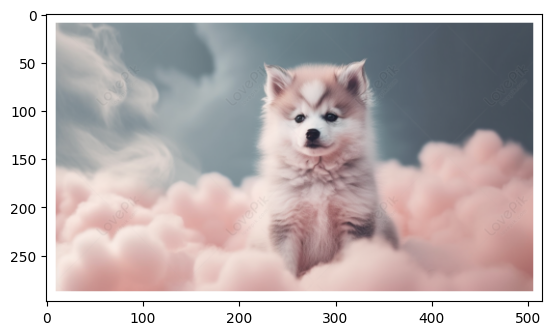

In [10]:
# Загрузка предварительно обученной модели SSD
model = ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

# Загрузка изображения
# image_path = "Dog.jpg"
# image = Image.open(image_path).convert("RGB")

# # Преобразование изображения и детекция
# tensor_image = F.to_tensor(image).unsqueeze(0)
with torch.no_grad():
    prediction = model(image_tensor)

# Отрисовка результатов на изображении
image = torch.tensor(image_tensor[0].permute(1, 2, 0).numpy())
fig, ax = plt.subplots(1)
ax.imshow(image)

[17]


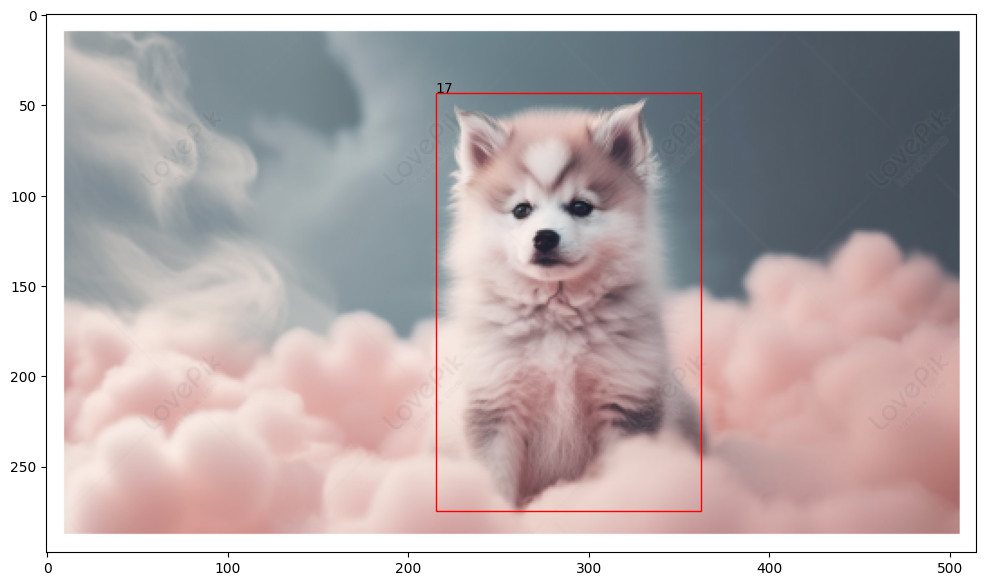

In [24]:
# Загрузка изображения
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)
threshold = 0.3
labels = prediction[0]['labels'][prediction[0]['scores'] > threshold].numpy()
print(labels)
predicted_boxes = prediction[0]['boxes'][prediction[0]['scores'] > threshold].numpy()
for box, label in zip(predicted_boxes, labels):
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.text(box[0], box[1], str(label), color="black")
    ax.add_patch(rect)
plt.show()


In [28]:
dog_image = "dog.jpg"
image = Image.open(dog_image).convert("RGB")

# Преобразование изображения и детекция
image_tensor_2 = F.to_tensor(image).unsqueeze(0)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


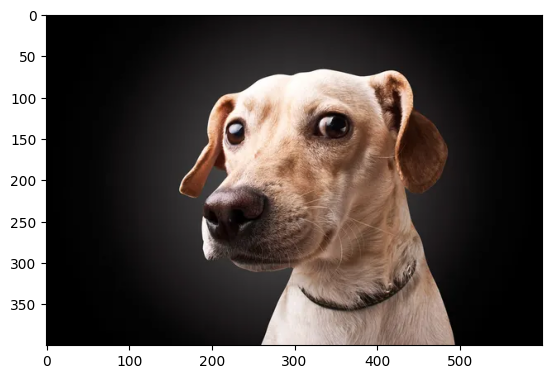

In [31]:
# Загрузка предварительно обученной модели SSD
model = ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

with torch.no_grad():
    prediction = model(image_tensor_2)

# Отрисовка результатов на изображении
image = torch.tensor(image_tensor_2[0].permute(1, 2, 0).numpy())
fig, ax = plt.subplots(1)
ax.imshow(image)

[18]


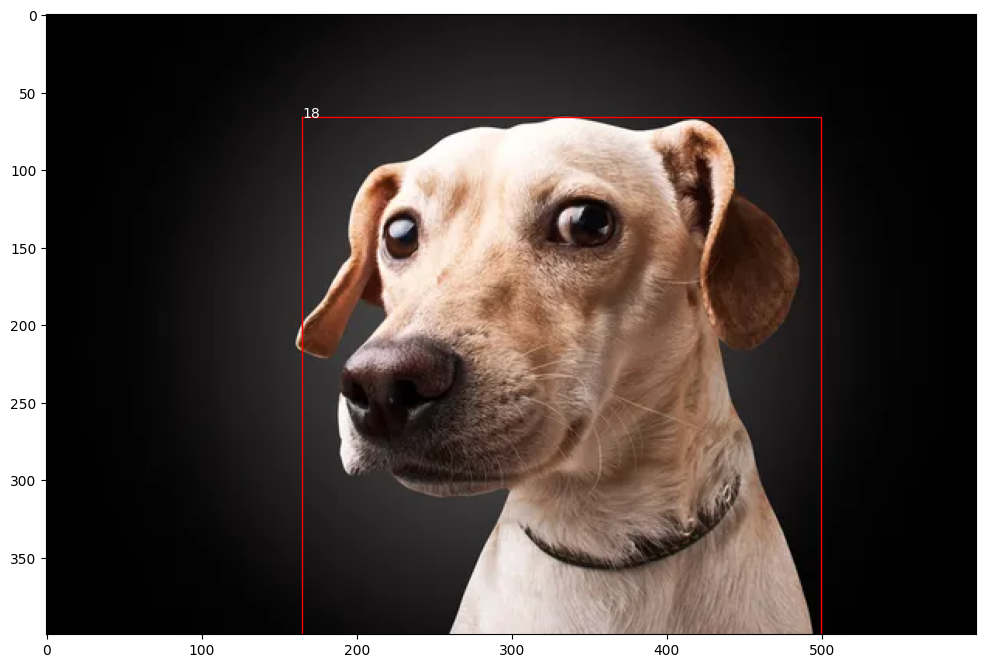

In [33]:
# Загрузка изображения
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)
threshold = 0.3
labels = prediction[0]['labels'][prediction[0]['scores'] > threshold].numpy()
print(labels)
predicted_boxes = prediction[0]['boxes'][prediction[0]['scores'] > threshold].numpy()
for box, label in zip(predicted_boxes, labels):
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.text(box[0], box[1], str(label), color="white")
    ax.add_patch(rect)
plt.show()
